In [1]:
import numpy as np, scipy.stats, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from sklearn.cluster import KMeans

Read in the Excel data. The Excel file contains two sheets, one of which is the transpose of the other. We want the first sheet, which Pandas reads by default.

In [2]:
survey = pd.read_excel('survey.xlsx')

In [3]:
survey.head(5)

Grade  Class  English is one of my favorite subjects.  \
0      3      2                                      1.0   
1      3      2                                      3.0   
2      3      2                                      3.0   
3      3      2                                      4.0   
4      3      2                                      NaN   

   English is one of my most challenging subjects.  \
0                                              5.0   
1                                              4.0   
2                                              4.0   
3                                              3.0   
4                                              NaN   

   I often don’t understand what’s going on in English class.  \
0                                                5.0            
1                                                3.0            
2                                                3.0            
3                                                2.0            
4                                                NaN            

   I believe it’s important to learn English.  \
0                                         1.0   
1                                         3.0   
2                                         5.0   
3                                         5.0   
4                                         NaN   

   I receive a lot of help from the other students.  \
0                                               3.0   
1                                               3.0   
2                                               3.0   
3                                               3.0   
4                                               NaN   

   I find the other students distracting.  \
0                                     3.0   
1                                     3.0   
2                                     4.0   
3                                     4.0   
4                                     NaN   

   If the teachers at our school were less strict, I would learn more.  \
0                                                3.0                     
1                                                3.0                     
2                                                3.0                     
3                                                1.0                     
4                                                NaN                     

   When I have a question, I tend to ask Max.  ...  More videos  More games  \
0                                         3.0  ...          5.0         5.0   
1                                         3.0  ...          4.0         4.0   
2                                         4.0  ...          4.0         4.0   
3                                         3.0  ...          5.0         3.0   
4                                         NaN  ...          NaN         NaN   

   More partner/group activities  More competitions  More presentations  \
0                            4.0                2.0                 2.0   
1                            3.0                3.0                 3.0   
2                            3.0                2.0                 3.0   
3                            2.0                1.0                 1.0   
4                            NaN                NaN                 NaN   

   More of something else Do you attend an English hagwon?  \
0                     NaN                              0.0   
1                     NaN                              0.0   
2                     NaN                              1.0   
3                     NaN                              1.0   
4                     NaN                              0.0   

   Do you get one-on-one tutoring in English?  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                       

First we make a basic count plot showing how many responses there were to each question (154 surveys received total).

In [4]:
pd.DataFrame(survey.count())

0
Grade                                               154
Class                                               154
English is one of my favorite subjects.             140
English is one of my most challenging subjects.     140
I often don’t understand what’s going on in Eng...  139
I believe it’s important to learn English.          139
I receive a lot of help from the other students.    139
I find the other students distracting.              137
If the teachers at our school were less strict,...  139
When I have a question, I tend to ask Max.          139
In general, Max is too lenient.                     139
More videos                                         139
More games                                          136
More partner/group activities                       135
More competitions                                   135
More presentations                                  133
More of something else                               16
Do you attend an English hagwon?                    146
Do you get one-on-one tutoring in English?          146
Is there anything else you want Max to know?         31
What temperature should we put the A/C at?          132

Now we compute <em>t</em>-scores using SciPy for all the agree/disagree questions. The null hypothesis is that the average is 3. We also compute <em>p</em>-values and flag for significance at the 0.05 level. 

In [5]:
results = pd.DataFrame(scipy.stats.ttest_1samp((survey.iloc[:,2:16]),3, nan_policy='omit')).T
results.index = survey.columns[2:16]
results.columns = ['T-score','p-value']
results['sig'] = results['p-value'] < 0.05
results

T-score       p-value  \
English is one of my favorite subjects.             -2.317269  2.194986e-02   
English is one of my most challenging subjects.      3.698667  3.112224e-04   
I often don’t understand what’s going on in Eng...  -0.260610  7.947818e-01   
I believe it’s important to learn English.           9.045063  1.232238e-15   
I receive a lot of help from the other students.     1.485556  1.396776e-01   
I find the other students distracting.             -10.515820  2.703568e-19   
If the teachers at our school were less strict,...  -2.833684  5.292320e-03   
When I have a question, I tend to ask Max.           0.699360  4.855040e-01   
In general, Max is too lenient.                      6.384556  2.436997e-09   
More videos                                         16.546047  1.440986e-34   
More games                                          13.993895  4.698432e-28   
More partner/group activities                       -0.451455  6.523913e-01   
More competitions                                   -4.277926  3.563005e-05   
More presentations                                  -4.831435  3.701202e-06   

                                                      sig  
English is one of my favorite subjects.              True  
English is one of my most challenging subjects.      True  
I often don’t understand what’s going on in Eng...  False  
I believe it’s important to learn English.           True  
I receive a lot of help from the other students.    False  
I find the other students distracting.               True  
If the teachers at our school were less strict,...   True  
When I have a question, I tend to ask Max.          False  
In general, Max is too lenient.                      True  
More videos                                          True  
More games                                           True  
More partner/group activities                       False  
More competitions                                    True  
More presentations                                   True

Heat map of <em>t</em>-scores from above. This is better visualized, however, by the bar graph below.

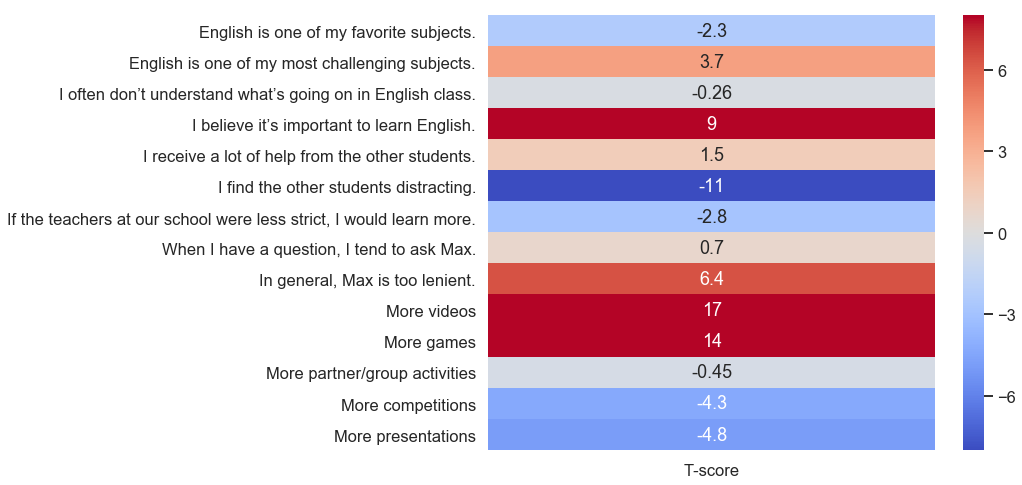

In [6]:
sns.set(context='talk',rc={'figure.figsize':(10,8)})
sns.heatmap(data=  results[['T-score']], # double brackets return it as a df instead of series
            cmap=  'coolwarm',
            annot= True,
            vmin= -8.01, 
            vmax=  8.01 )

I made two versions of this bar graph; the scale on the color map is wrong on the first one. See Stack Overflow link for discussion.

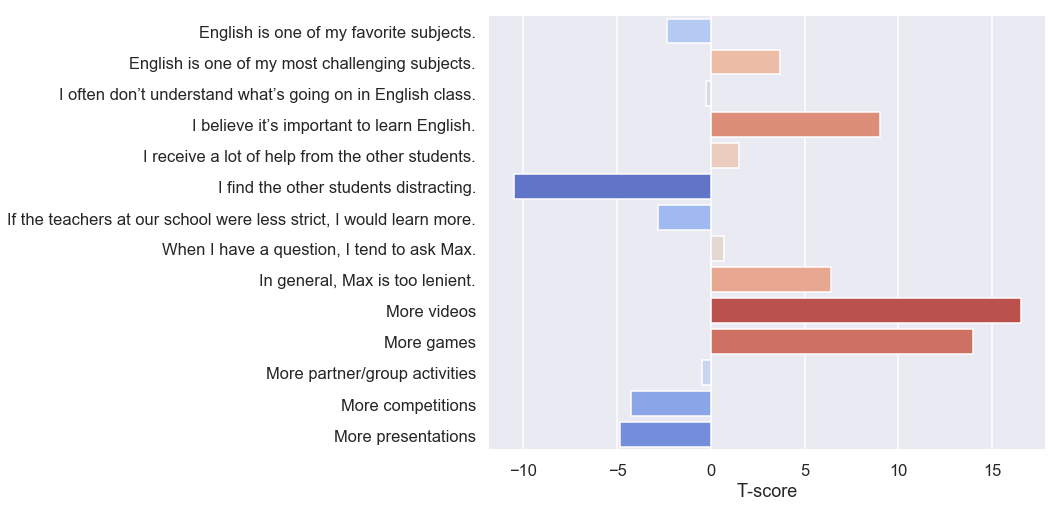

In [7]:
# From a helpful guy on SE
# https://stackoverflow.com/questions/57601156/change-axis-along-which-pandas-applies-color-palette/57601461?noredirect=1#comment101680212_57601461
val_order = results['T-score'].rank(method='max').astype(int) # rank ordered values in column 't'
val_index = val_order - 1 # convert for use as a list index
colors = sns.color_palette('coolwarm', len(results.index)) # list of N colors spaced along coolwarm
palette = [colors[x] for x in val_index] # re-order colors with increasing value of 't'

sns.set(context='talk',rc={'figure.figsize':(10,8)})
sns.barplot(data=  results,
        y=     results.index,
        x=     'T-score', 
        palette= palette)

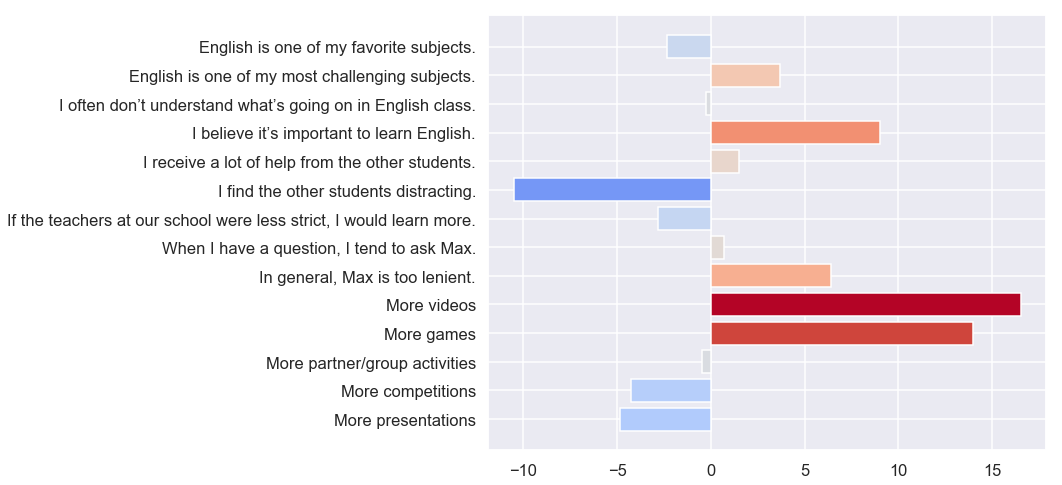

In [8]:
# better version, also from SE
sns.set(context='talk',rc={'figure.figsize':(10,8)})

absmax = np.abs(results['T-score'].values).max()
norm = plt.Normalize(-absmax, absmax)
cmap = plt.get_cmap("coolwarm")
colors = cmap(norm(results['T-score'].values))
plt.barh("index", "T-score", data=results.reset_index(), color=colors)

plt.gca().invert_yaxis()
plt.show()

As the above obscures differences between the classes and grades, we make a heatmap with the <em>t</em>-scores used as an aggregating function on a pivot table broken up by class section.

In [9]:
classbreakdown = survey.iloc[:,:16].pivot_table(index=['Grade','Class'],
                                                aggfunc=(lambda x: scipy.stats.ttest_1samp(x,3, nan_policy='omit')[0]))
    # Aggfunc above is computing t-scores centered around 3
classbreakdown = np.round(classbreakdown,decimals=1)
classbreakdown = classbreakdown[survey.columns[2:16]].T
    # Restores original column order

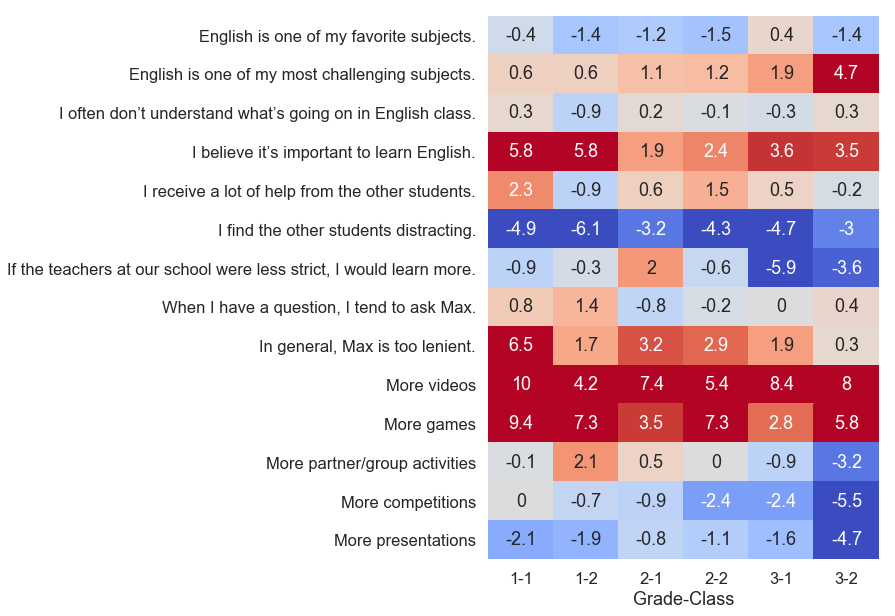

In [10]:
sns.set(context='talk',rc={'figure.figsize':(7,10)})
sns.heatmap(classbreakdown,cmap="coolwarm",cbar=False,vmin=-4,vmax=4,annot=True)
# sns.heatmap(classbreakdown.iloc[2:16],annot=True,vmin=1,vmax=5,cmap="coolwarm")
    # Will just give normal averages

Now we will compute *r* between all the quantitative questions. A Seaborn heatmap makes it easy to spot the action. Note especially the perceived importance column. Also negative correlation between hagwon and challenge, difficulty understanding. Lenience questions had little to do with perceived challenge or anything.

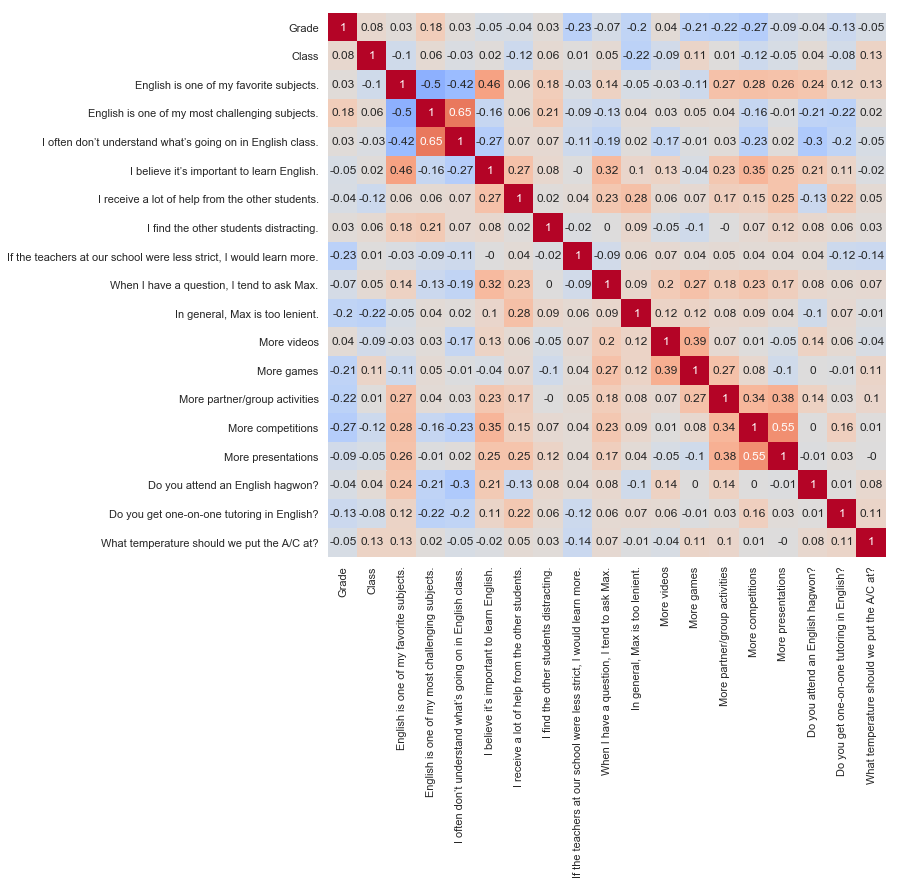

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
heatmap = sns.heatmap(np.round(survey.corr(),decimals=2),
            cmap="coolwarm",
            cbar=False,
            vmin=-1,
            vmax= 1,
            annot=True)

# Code from SE that rotates the labels. I couldn't get it to work; 
# labels keep clumping together on x axis.
# loc, labels = plt.xticks()
# heatmap.set_xticklabels(labels, rotation=45)
# heatmap.set_yticklabels(labels[::-1], rotation=45) # reversed order for y

This just illustrates that with so many dimensions, even random data will have some *r* values in the 0.2 range.

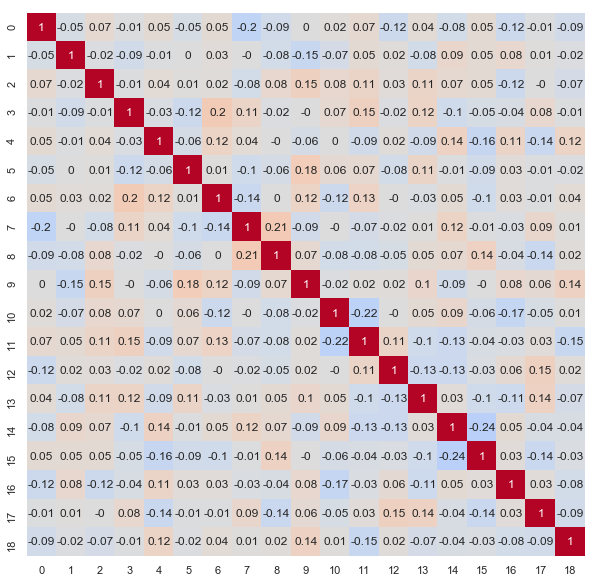

In [12]:
# Random data
randcb = pd.DataFrame(np.random.rand(150,19)*4 + 1)

# Same plotting code
sns.set(rc={'figure.figsize':(10,10)})
heatmap = sns.heatmap(np.round(randcb.corr(),decimals=2),
            cmap="coolwarm",
            cbar=False,
            vmin=-1,
            vmax= 1,
            annot=True)

Now we go on to the clustering. First we select the columns that we care about, then we will in empty answers with the column averages (one of many reasons not to use cluster analysis to describe *individual* students!).

In [13]:
imputed = survey.iloc[:,[2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18]] # Select class-relevant quantitative features
imputed = imputed.apply(lambda x: x.fillna(x.mean()),axis=0) # Impute nans with column averages

In [14]:
# Train and predict
model = KMeans(n_clusters= 3, random_state=1987)
model.fit(imputed)
survey['Cluster'] = model.predict(imputed)

In [15]:
clusterbreakdown = survey.iloc[:,[2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18,21]].pivot_table(index=['Cluster'])
clusterbreakdown = np.round(clusterbreakdown,decimals=2)
clusterbreakdown = clusterbreakdown[survey.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18]]]
    # Restores original column order
clusterbreakdown['Number in cluster']= survey['Cluster'].value_counts(sort=None)
    # Append a column showing the number in each cluster
clusterbreakdown = clusterbreakdown.T

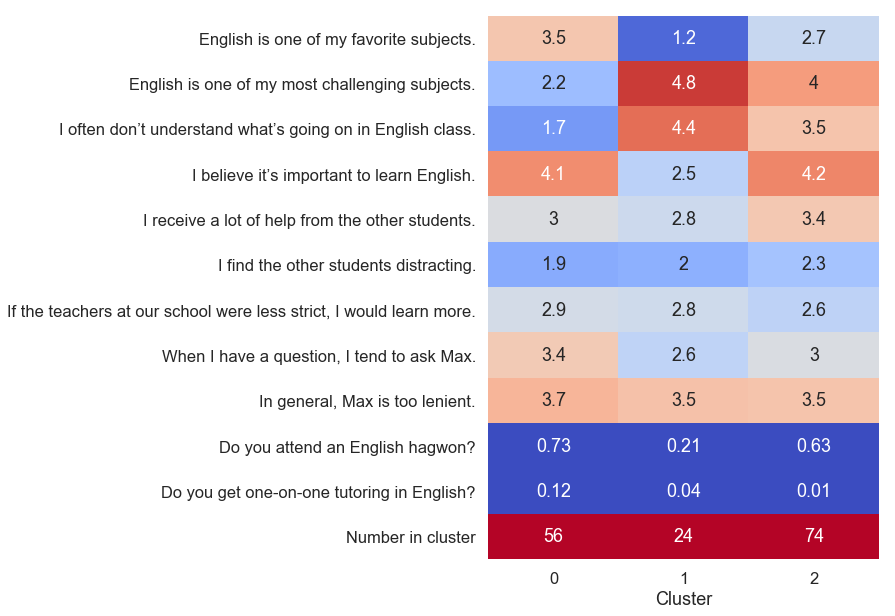

In [16]:
# Heatmap again
sns.set(context='talk',rc={'figure.figsize':(7,10)})
sns.heatmap(clusterbreakdown,cmap="coolwarm",cbar=False,vmin=1,vmax=5,annot=True)

I want a better illustration of how this clustering works, so I make a grid of bar graphs comparing students responses to the motivation and enjoyment question. Note that the clustering algorithm use more than just these two questions, but they were some of the ones with the most divergent responses, so they should show us a decent separation between the groups.

Here is a <a href="https://stackoverflow.com/questions/58303175/plotting-three-dimensions-of-categorical-data-in-python">StackOverflow</a> question that explains how I got this graph to work.

In [260]:
# Pair of importance and favorite
grouped = survey[['English is one of my favorite subjects.','I believe it’s important to learn English.','Cluster']]
grouped['Dummy'] = np.ones(len(grouped))
grouped = grouped.pivot_table(index=['English is one of my favorite subjects.','I believe it’s important to learn English.'],columns='Cluster',aggfunc='count')['Dummy']
grouped

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Cluster                                                                                0  \
English is one of my favorite subjects. I believe it’s important to learn English.         
1.0                                     1.0                                          1.0   
                                        3.0                                          2.0   
                                        4.0                                          NaN   
                                        5.0                                          1.0   
2.0                                     2.0                                          2.0   
                                        3.0                                          1.0   
                                        4.0                                          4.0   
                                        5.0                                          NaN   
3.0                                     2.0                                          1.0   
                                        3.0                                          3.0   
                                        4.0                                          5.0   
                                        5.0                                          5.0   
4.0                                     2.0                                          1.0   
                                        3.0                                          1.0   
                                        4.0                                          6.0   
                                        5.0                                         10.0   
5.0                                     4.0                                          3.0   
                                        5.0                                          8.0   

Cluster                                                                               1  \
English is one of my favorite subjects. I believe it’s important to learn English.        
1.0                                     1.0                                         8.0   
                                        3.0                                         7.0   
                                        4.0                                         3.0   
                                        5.0                                         1.0   
2.0                                     2.0                                         NaN   
                                        3.0                                         4.0   
                                        4.0                                         NaN   
                                        5.0                                         NaN   
3.0                                     2.0                                         NaN   
                                        3.0                                         1.0   
                                        4.0                                         NaN   
                                        5.0                                         NaN   
4.0                                     2.0                                         NaN   
                                        3.0                                         NaN   
                                        4.0                                         NaN   
                                        5.0                                         NaN   
5.0                                     4.0                                         NaN   
                                        5.0                                         NaN   

Cluster                                                                                2  
English is one of my favorite subjects. I believe it’s important to learn English.        
1.0                                     1.0                                          NaN  
                                        3.0                      

In [261]:
# List of clusters
kinds = grouped.columns

# Indices (tell us which axes to plot to)
index, _, _, _ = zip(*list(grouped.itertuples()))
# transforms the index values so they can index the subplots
index = [(int(5-i[0]),int(i[1]-1)) for i in index]
# Having the index already quantitative helped a lot here.
# Would need to use list comprehension with index() if given
# actual categorical labels.

# Array containing the values to graph
vals = grouped.fillna(0).to_numpy()
vals = np.vectorize(int)(vals) # Not actually necessary

# colors for bar graph (kinda hacky)
colors = [get_cmap('Set1')(v) for v in np.linspace(0,.3,len(kinds))]

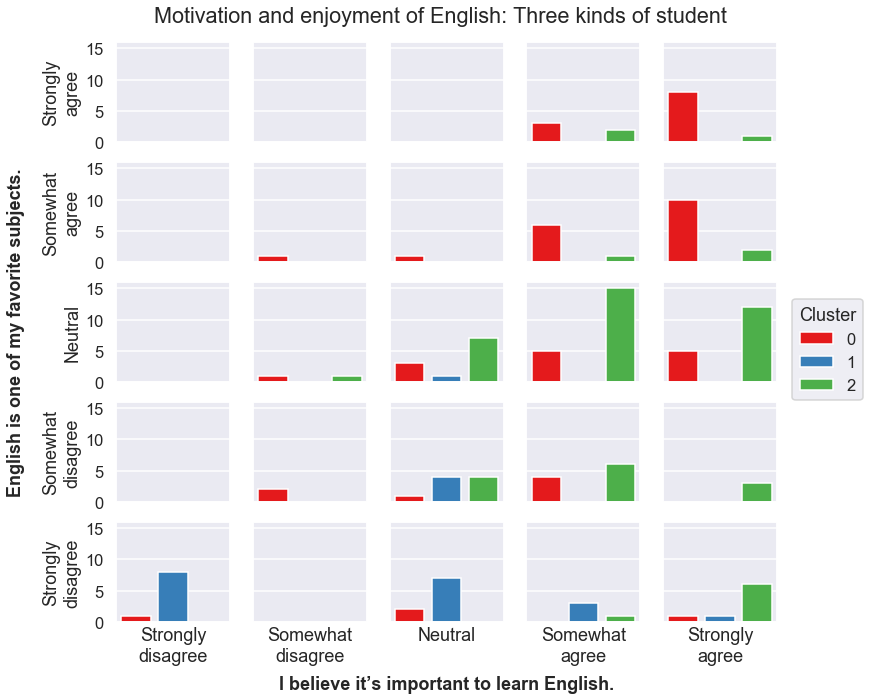

In [266]:
sns.set(context="talk")
nxplots = 5
nyplots = 5
fig, axes = plt.subplots(nxplots,
                         nyplots,
                         sharey=True,
                         sharex=True,
                         figsize=(12,10))

fig.suptitle('Motivation and enjoyment of English: Three kinds of student')

for dex, data in zip(index, vals):
    axes[dex[0],dex[1]].bar(kinds,data,color=colors)
    
plt.setp(axes,ylim=(0,16),xticks=[],yticks=[0,5,10,15])
    
axeslabels = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none',
                top=False,
                bottom=False,
                left=False,
                right=False)
plt.grid(False)
axeslabels.set_ylabel('English is one of my favorite subjects.',weight="bold")
axeslabels.set_xlabel('I believe it’s important to learn English.',weight='bold')
axeslabels.tick_params(axis='y',pad=55)
axeslabels.tick_params(axis='x',pad=25)

# x- and y-axis labels
responses=['Strongly\ndisagree','Somewhat\ndisagree','Neutral','Somewhat\nagree','Strongly\nagree']
for i, j in enumerate(responses):
    axes[4,i].set_xlabel(j)
    axes[4-i,0].set_ylabel(j)
    
# Tune this manually to make room for the legend
fig.subplots_adjust(right=0.89,top=.93)

fig.legend([Patch(facecolor = i) for i in colors],
           kinds,
           title="Cluster",
           loc="center right")

Find the perfect classroom temperature using a 10% trimmed mean.

In [263]:
scipy.stats.trim_mean(survey['What temperature should we put the A/C at?'].dropna(inplace= False),.1)

20.87264150943396